# Main Title

Intro ...

In [1]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

...

In [2]:
pp_may_24_url = 'http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-monthly-update-new-version.csv'
pp_23 = 'http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2023.csv'

pp_may_24 = pd.read_csv(pp_may_24_url, header=None)

In [3]:
pp_cols = ['id', 'price', 'date', 'postcode', 'type', 'new', 'duration',
           'paon', 'saon', 'street', 'locality', 'town', 'district', 'county',
           'ppd_category_type', 'record_status']
pp_may_24.columns = pp_cols

pp_may_24['date'] = pd.to_datetime(pp_may_24['date'])

# str_cols = ['paon', 'saon', 'street', 'locality', 'town', 'district', 'county']
# for str_col in str_cols:
#   pp_may_24[str_col] = pp_may_24[str_col].astype(str)

...

In [4]:
def print_df_summary(df):
  print("Shape:")
  display(df.shape)

  total_nas = df.isna().sum().sum()
  rows_nas  = df.isnull().any(axis=1).sum()
  cols_nas  = df.isnull().any().sum()
  print('\nTotal NAs:', total_nas)
  print('Rows with NAs:', rows_nas)
  print('Cols with NAs:', cols_nas)

  print("\nInfo:")
  display(df.info())

  print("\nSummary stats:")
  display(df.describe())

  print("\nRaw data:")
  display(df)
  print("\n")


print_df_summary(pp_may_24)


for grp in ['type', 'new', 'duration', 'ppd_category_type', 'record_status']:
  print('\n')
  display(pp_may_24[[grp, 'price']].groupby(grp).describe())


print('\n\nNaNs:')
pp_may_24.isnull().sum()

Shape:


(78452, 16)


Total NAs: 115542
Rows with NAs: 76402
Cols with NAs: 4

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78452 entries, 0 to 78451
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 78452 non-null  object        
 1   price              78452 non-null  int64         
 2   date               78452 non-null  datetime64[ns]
 3   postcode           78176 non-null  object        
 4   type               78452 non-null  object        
 5   new                78452 non-null  object        
 6   duration           78452 non-null  object        
 7   paon               78452 non-null  object        
 8   saon               12521 non-null  object        
 9   street             77217 non-null  object        
 10  locality           30352 non-null  object        
 11  town               78452 non-null  object        
 12  district           78452 non-null  object        
 1

None


Summary stats:


,price,date
count,7.845200e+04,78452
mean,4.357407e+05,2023-06-04 22:15:07.112629248
min,1.000000e+02,1995-01-06 00:00:00
25%,1.760000e+05,2023-03-31 00:00:00
50%,2.750000e+05,2024-01-16 00:00:00
75%,4.180000e+05,2024-04-12 00:00:00
max,9.000000e+08,2024-05-31 00:00:00
std,4.601969e+06,NaN



Raw data:


,id,price,date,postcode,type,new,duration,paon,saon,street,locality,town,district,county,ppd_category_type,record_status
0,{1A0C5C63-265E-7CBE-E063-4804A8C06C96},249955,2021-06-24,CF72 9WU,D,N,F,36,NaN,BLACKTHORN COURT,LLANHARRY,PONTYCLUN,RHONDDA CYNON TAFF,RHONDDA CYNON TAFF,A,A
1,{1A0C5C63-26CF-7CBE-E063-4804A8C06C96},365000,2021-08-31,LL67 0LT,D,N,F,12,NaN,MAES CAPEL,NaN,CEMAES BAY,ISLE OF ANGLESEY,ISLE OF ANGLESEY,A,A
2,{1A0C5C63-270D-7CBE-E063-4804A8C06C96},202000,2021-09-30,SA4 6PW,T,N,F,31,NaN,HEOL CAE TYNEWYDD,LOUGHOR,SWANSEA,SWANSEA,SWANSEA,A,A
3,{1A0C5C63-2789-7CBE-E063-4804A8C06C96},300000,2021-06-30,SA11 3EU,D,N,F,14,NaN,DAVIES ANDREWS ROAD,TONNA,NEATH,NEATH PORT TALBOT,NEATH PORT TALBOT,A,A
4,{1A0C5C63-27A6-7CBE-E063-4804A8C06C96},115000,2021-08-11,NP10 8BL,T,N,F,12,NaN,SKYE GROVE,DUFFRYN,NEWPORT,NEWPORT,NEWPORT,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78447,{1061746E-A86B-3C34-E063-4804A8C0F9E7},55462,2024-01-19,SN13 0QU,T,N,L,52,NaN,STONE CLOSE,NaN,CORSHAM,WILTSHIRE,WILTSHIRE,A,D
78448,{1061746E-6EA8-3C34-E063-4804A8C0F9E7},295000,2024-01-02,BS23 4JL,F,N,L,25,FLAT 2,FRENCHAY ROAD,NaN,WESTON-SUPER-MARE,NORTH SOMERSET,NORTH SOMERSET,A,D
78449,{1061746E-6EDD-3C34-E063-4804A8C0F9E7},290000,2024-01-12,TA6 7BZ,D,N,F,8,NaN,STAG VALLEY ROAD,NaN,BRIDGWATER,SOMERSET,SOMERSET,A,D
78450,{1061746E-8AB6-3C34-E063-4804A8C0F9E7},81735,2024-01-19,DH4 4QL,T,N,F,3,NaN,WOODHALL SPA,SHINEY ROW,HOUGHTON LE SPRING,SUNDERLAND,TYNE AND WEAR,A,D


price                                                            \
        count          mean           std      min        25%       50%   
type                                                                      
D     17572.0  4.877258e+05  5.764996e+05   2000.0  300875.25  400000.0   
F     16214.0  3.243198e+05  5.104410e+05   2500.0  147500.00  235000.0   
O      5392.0  1.537092e+06  1.523031e+07    100.0  115000.00  298100.0   
S     20003.0  3.007591e+05  2.245559e+05  20000.0  186150.00  255000.0   
T     19271.0  3.140368e+05  4.512705e+06    750.0  138000.00  215000.0   

                             
           75%          max  
type                         
D     550250.0   49872000.0  
F     370000.0   18000000.0  
O     745393.0  900000000.0  
S     355000.0   10350000.0  
T     325000.0  620000000.0

price                                                          \
       count           mean           std    min       25%       50%   
new                                                                    
N    64656.0  448297.488570  5.065828e+06  100.0  165339.5  260000.0   
Y    13796.0  376892.101044  3.966385e+05  999.0  239950.0  326000.0   

                            
          75%          max  
new                         
N    410000.0  900000000.0  
Y    435000.0   16930000.0

price                                                          \
            count           mean           std    min       25%       50%   
duration                                                                    
F         57834.0  460113.849812  5.019737e+06  100.0  194995.0  294995.0   
L         20618.0  367373.239742  3.145992e+06  100.0  140000.0  224175.0   

                                 
               75%          max  
duration                         
F         435000.0  900000000.0  
L         352000.0  414108660.0

price                                                \
                     count           mean           std    min       25%   
ppd_category_type                                                          
A                  63001.0  365273.105506  2.508848e+06  750.0  190000.0   
B                  15451.0  723070.023105  9.042562e+06  100.0  119000.0   

                                                    
                        50%       75%          max  
ppd_category_type                                   
A                  285000.0  422500.0  620000000.0  
B                  215596.0  385000.0  900000000.0

price                                                \
                 count           mean           std    min       25%   
record_status                                                          
A              71383.0  427539.129583  4.484793e+06  100.0  179995.5   
C               2151.0  873225.216179  1.013442e+07  500.0  132997.5   
D               4918.0  363438.942660  9.514494e+05  500.0  170000.0   

                                                
                    50%       75%          max  
record_status                                   
A              275000.0  419995.0  900000000.0  
C              247000.0  433500.0  414108660.0  
D              265500.0  400000.0   52000000.0



NaNs:


id                       0
price                    0
date                     0
postcode               276
type                     0
new                      0
duration                 0
paon                     0
saon                 65931
street                1235
locality             48100
town                     0
district                 0
county                   0
ppd_category_type        0
record_status            0
dtype: int64

...

In [5]:
pp_file = '/content/pp-complete.1.csv'

if not os.path.exists(pp_file):
  !apt-get install aria2
  !aria2c -x 16 -s 16 'http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-complete.csv' -o pp-complete.1.csv
else:
  print(f'{pp_file} already downloaded')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libaria2-0 libc-ares2
The following NEW packages will be installed:
  aria2 libaria2-0 libc-ares2
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,513 kB of archives.
After this operation, 5,441 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libc-ares2 amd64 1.18.1-1ubuntu0.22.04.3 [45.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libaria2-0 amd64 1.36.0-1 [1,086 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 aria2 amd64 1.36.0-1 [381 kB]
Fetched 1,513 kB in 2s (726 kB/s)
Selecting previously unselected package libc-ares2:amd64.
(Reading database ... 123586 files and directories currently installed.)
Preparing to unpack .../libc-ares2_1.18.1-1ubuntu0.22.04.3_amd64.deb ...
Unpacking libc-ares2:amd64 (1.18.1-1ubuntu

In [6]:
!pip install vaex

import vaex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 95.0 MB/s eta 0:00:0

...

In [7]:
import vaex


df = vaex.open(pp_file)

pp_cols = ['id', 'price', 'date', 'postcode', 'type', 'new', 'duration',
           'paon', 'saon', 'street', 'locality', 'town', 'county',
           'record_status']

old_names = df.get_column_names()
new_names = pp_cols
pp_names = dict(zip(old_names, new_names))

for old_name in pp_names:
  new_name = pp_names[old_name]
  df.rename(old_name, new_name)


display(df.info())

column,type,unit,description,expression
id,str,,,
price,int64,,,
date,datetime64[s],,,
postcode,str,,,
type,str,,,
new,str,,,
duration,str,,,
paon,str,,,
saon,str,,,
street,str,,,


None

...

In [8]:
# df.select(df.price > 0)

#df.select(df.price > 500000000)
#display(df.evaluate(df[['price', 'date', 'postcode']], selection=True))
#df.price

# df['price_jit'] = df.price.jit_numba()
#df['price_jit'] = df.price.jit_cuda()
df['price_float'] = df.price.astype('float64')
# df['price_jit'] = df.price_float.jit_cuda()

# display(df.price.mean())
# display(df.mean(df.price))
price_mean = df.mean(df.price_float)
price_std  = df.std(df.price_float)
# price_lim = price_mean + 10 * price_std
price_lim = 500_000_000
display(price_lim)
# display(df.mean(df.price_float))
# display(df.std(df.price_float))
# display(vaex.stat.mean(df.price))

df_error = df[df.price > price_lim]
display(df_error)

# df[df.price > vaex.stat.std(df.price)]

500000000

#,id,price,date,postcode,type,new,duration,paon,saon,street,locality,town,county,record_status,price_float
0,{582D0637-EE28-8F22-E053-6C04A8C01BAC},594300000,2017-07-31 00:00:00,W1U 8EW,O,N,L,55,UNIT 53,BAKER STREET,,CITY OF WESTMINSTER,GREATER LONDON,B,5.943e+08
1,{666758D7-A512-3363-E053-6B04A8C0D74E},569200000,2018-02-08 00:00:00,W1J 7BT,O,N,F,2,,STANHOPE ROW,,CITY OF WESTMINSTER,GREATER LONDON,B,5.692e+08
2,{06C9F488-12CE-9388-E063-4804A8C0BD98},542540820,2019-11-20 00:00:00,NW5 2HB,O,N,F,36,,FORTESS ROAD,,CAMDEN,GREATER LONDON,B,5.42541e+08
3,{EA3278AA-FA35-2676-E053-6B04A8C015F8},523000000,2021-09-16 00:00:00,,O,N,L,ONE THAMES,PHASE 1,NINE ELMS LANE,,WANDSWORTH,GREATER LONDON,B,5.23e+08
4,{1A0C5C64-0E03-7CBE-E063-4804A8C06C96},900000000,2021-03-29 00:00:00,TN23 7HE,O,N,F,"PENROSE HOUSE, 46",APARTMENT 1,VICTORIA ROAD,,ASHFORD,KENT,B,9e+08
5,{1A0C5C63-CA26-7CBE-E063-4804A8C06C96},620000000,2023-01-06 00:00:00,CV33 9FR,T,N,F,OAKLEY WOOD BARN,2,BANBURY ROAD,BISHOPS TACHBROOK,WARWICK,WARWICKSHIRE,A,6.2e+08


...

In [20]:
#df_london = df[df.county.str.contains('GREATER LONDON')]
#london_counts = df_london.count(df_london.price, binby=df_london.town)
#london_counts

#df.categorize('county', inplace=True)

df.count(binby=['town'], shape=1, selection="county.str.contains('GREATER LONDON')")

AttributeError: 'Attribute' object has no attribute 'id'

...

In [15]:
display(old_names)

['{109BBF80-1E51-4910-8E2C-B124E1117A7A}',
 'price',
 '1995-06-09 00:00',
 'BA3 3AH',
 'F',
 'N',
 'L',
 'COOMBEND HOUSE',
 '7',
 'COOMBEND',
 'RADSTOCK',
 'WANSDYKE',
 'AVON',
 'A']

...

In [6]:
!pip install datatable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 MB 23.7 MB/s eta 0:00:00


...

In [39]:
import datatable as dt
from datatable import (dt, f, by, ifelse, update, sort,
                       count, min, max, mean, sum, rowsum)


DT = dt.fread(pp_file)
pp_cols = ['id', 'price', 'date_str', 'postcode', 'type', 'new', 'duration',
           'paon', 'saon', 'street', 'locality', 'town', 'district', 'county',
           'ppd_category_type', 'record_status']
DT.names = pp_cols

display(DT)
print('\n')
display(DT.stypes)

,id,price,date_str,postcode,type,new,duration,paon,saon,street,…,town,district,county,ppd_category_type,record_status
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,{109BBF80-1E51-4910-8E2C-B124E1117A7A},34950,1995-06-09 00:00,BA3 3AH,F,N,L,COOMBEND HOUSE,7,COOMBEND,…,RADSTOCK,WANSDYKE,AVON,A,A
1,{D5233D67-2975-426B-B98D-B124E39331D9},133000,1995-06-19 00:00,SW18 5AG,T,N,F,142,,ASTONVILLE STREET,…,LONDON,WANDSWORTH,GREATER LONDON,A,A
2,{718BD35C-25E1-431C-8AF7-B124E63ED4E1},83000,1995-08-21 00:00,IP11 7PU,D,N,F,3,,GARFIELD ROAD,…,FELIXSTOWE,SUFFOLK COASTAL,SUFFOLK,A,A
3,{E127F626-6247-4D95-A392-B124F4C0A558},59000,1995-07-27 00:00,PE21 0SF,D,Y,F,BEAUCADRE,,GAYSFIELD ROAD,…,BOSTON,BOSTON,LINCOLNSHIRE,A,A
4,{B10762A0-2C9C-4C82-A885-B1250B55FFF9},51000,1995-02-28 00:00,ME7 4DF,T,N,F,41,,FRANKLIN ROAD,…,GILLINGHAM,GILLINGHAM,KENT,A,A
5,{BBAB55E8-216F-4FFA-B9EC-B4AD71F833EB},37000,1995-06-02 00:00,TN1 2ET,F,N,L,48,TOP FLOOR FLAT,UPPER GROSVENOR ROAD,…,TUNBRIDGE WELLS,TUNBRIDGE WELLS,KENT,A,A
6,{FD34F0B9-8697-481D-A231-B4AD7716F2F5},55000,1995-05-12 00:00,ST19 5AP,D,N,F,GAS HOUSE,,PINFOLD LANE,…,STAFFORD,SOUTH STAFFORDSHIRE,STAFFORDSHIRE,A,A
7,{657B1EA4-A147-4E1B-B70F-B4AD98A15237},47750,1995-12-12 00:00,LL18 5SZ,S,Y,F,18,,FFORDD TERFYN,…,RHYL,RHUDDLAN,CLWYD,A,A
8,{FF6684D0-67EF-4FE1-AC8F-B4AD99ACE2CD},53000,1995-05-25 00:00,BS30 5XW,S,N,F,4,,GRASMERE GARDENS,…,BRISTOL,KINGSWOOD,AVON,A,A


(stype.str32,
 stype.int32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32)

## 1.

1. Find two land registry records that are likely to be errors

In [41]:
sel_cols = ['price', 'date_str', 'postcode', 'type', 'new', 'duration', 'paon',
            'saon', 'street', 'town', 'district', 'county']
DT[f.price > 600000000, sel_cols]

,price,date_str,postcode,type,new,duration,paon,saon,street,town,district,county
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,900000000,2021-03-29 00:00,TN23 7HE,O,N,F,"PENROSE HOUSE, 46",APARTMENT 1,VICTORIA ROAD,ASHFORD,ASHFORD,KENT
1,620000000,2023-01-06 00:00,CV33 9FR,T,N,F,OAKLEY WOOD BARN,2,BANBURY ROAD,LEAMINGTON SPA,WARWICK,WARWICKSHIRE


## 2.

Complete the following table by calculating the number of sales and average sale price for
all London Boroughs in 2023:

In [42]:
# Add time64 'Date' column based on str32 'date_str' column to
DT[:, dt.update(Date =
             dt.time.ymd(dt.as_type(dt.str.slice(f.date_str, 0, 4), int),
                         dt.as_type(dt.str.slice(f.date_str, 5, 7), int),
                         dt.as_type(dt.str.slice(f.date_str, 8, 10), int)))]
DT['year'] = DT[:, dt.time.year(f.Date)]

# london = DT[dt.re.match(f.county, 'GREATER LONDON'), ['price', 'Date', 'year', 'county']]
# display(london)
# london_23 = DT[(dt.re.match(f.county, 'GREATER LONDON')) & (f.year == 2023), l23_cols]

l23_cols = ['id', 'price', 'Date', 'year', 'district', 'county']
l23_mask = dt.re.match(f.county, 'GREATER LONDON') & (f.year == 2023)
london_23 = DT[l23_mask, l23_cols]
# display(london_23)

london_23[:, {'count_sales': count(f.id), 'mean_price': mean(f.price)}, by('district')]

,district,count_sales,mean_price
,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,BARKING AND DAGENHAM,1355,397119
1,BARNET,3222,809265
2,BEXLEY,2543,432761
3,BRENT,1864,678122
4,BROMLEY,3741,603442
5,CAMDEN,1926,1.49899e+06
6,CITY OF LONDON,202,4.39989e+06
7,CITY OF WESTMINSTER,2648,2.36014e+06
8,CROYDON,3709,481384


## 3.

Count the number of new build Flats sold in each UK region since the start of 2020.

In [29]:
flats_since_2020 = DT[(f.year >= 2020) &
                      (f.type == 'F') &
                      (f.new == 'Y'), :]

flats_since_2020[:, {'count_flats': count(f.id)}, by('county')]

,county,count_flats
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,BATH AND NORTH EAST SOMERSET,327
1,BEDFORD,291
2,BLACKBURN WITH DARWEN,5
3,BLACKPOOL,53
4,BLAENAU GWENT,2
5,"BOURNEMOUTH, CHRISTCHURCH AND POOLE",1025
6,BRACKNELL FOREST,751
7,BRIDGEND,55
8,BRIGHTON AND HOVE,257


## 4.

Plot the number of sales per week since the start of 2020 as a line chart.

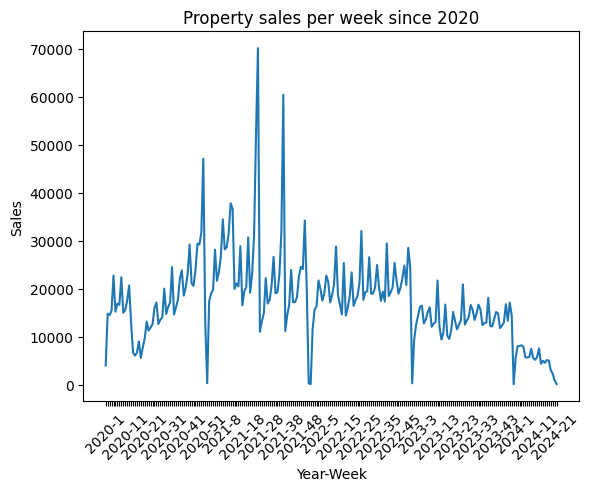

In [108]:
weeks_list = [_date.isocalendar().week for _date in DT["Date"].to_list()[0]]
DT[:, "week"] = dt.Frame(weeks_list)

DT_2020 = DT[f.year >= 2020, :]
sales_per_week = DT_2020[:, {'count_sales': count(f.id)}, by('year', 'week')]
sales_per_week[:, update(year_week = f.year + '-' + f.week)]
#display(sales_per_week)


sparse_labels = []
sales_labels = sales_per_week['year_week'].to_list()[0]
for index, item in enumerate(sales_labels):
    if index % 10 == 0:
        sparse_labels.append(item)
    else:
        sparse_labels.append('')

plt.plot(sales_per_week['count_sales'])
plt.xticks(range(0, len(sparse_labels)), sparse_labels, rotation=45)
plt.xlabel('Year-Week')
plt.ylabel('Sales')
plt.title('Property sales per week since 2020')
plt.show()

In [55]:
import datetime
from datetime import date


# DT['week'] = DT[:, dt.time.week(f.Date)]
# DT['week'] = DT['Date'].datetime.isocalendar().week
# DT["week"] = dt.Frame(DT[:, "Date"].to_pandas().datetime.isocalendar().week)
# DT["week"] = dt.Frame(DT[:, "date_str"].to_pandas().datetime.isocalendar().week)
# DT['week'] = pd.to_datetime(DT['Date']).datetime.isocalendar().week
# DT['week'] = pd.to_datetime(DT[:, 'date_str']).datetime.isocalendar().week

display(DT['date_str'].to_pandas())

DT['date_dt'] = pd.to_datetime(DT['date_str'].to_pandas())
DT['week'] = DT['date_dt'].datetime.isocalendar().week

DT[:, dt.update(week = date(dt.as_type(dt.str.slice(f.date_str, 0, 4), int),
                            dt.as_type(dt.str.slice(f.date_str, 5, 7), int),
                            dt.as_type(dt.str.slice(f.date_str, 8, 10), int)).isocalendar().week)]

DT_2020 = DT[f.year >= 2020, :]
DT_2020[:, {'count_sales': count(f.id)}, by('year', 'week')]

AttributeError: 'DataFrame' object has no attribute 'datetime'